# Data Preprocessing

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')



In [ ]:
#importing the dataset
dataset = pd.read_csv('diabetes2pima.csv')

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[ 80.    46.   130.   ...   0.64  40.     1.  ]
 [ 62.    36.     0.   ...   0.44  38.     1.  ]
 [ 74.    40.   105.   ...   0.2   45.     0.  ]
 ...
 [ 90.     0.     0.   ...   0.58  42.     1.  ]
 [ 72.     0.     0.   ...   0.48  26.     1.  ]
 [ 76.    37.     0.   ...   0.67  46.     1.  ]]


In [ ]:
dataset.head()

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes,Glucose
0,72,35,0,33.6,0.627,50,1,148
1,66,29,0,26.6,0.351,31,0,85
2,64,0,0,23.3,0.672,32,1,183
3,66,23,94,28.1,0.167,21,0,89
4,40,35,168,43.1,2.288,33,1,137


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.56  1.65  0.44 ...  0.53  0.57  1.37]
 [-0.35  1.02 -0.68 ... -0.07  0.4   1.37]
 [ 0.26  1.27  0.22 ... -0.79  0.99 -0.73]
 ...
 [ 1.07 -1.25 -0.68 ...  0.36  0.74  1.37]
 [ 0.16 -1.25 -0.68 ...  0.05 -0.62  1.37]
 [ 0.36  1.08 -0.68 ...  0.62  1.08  1.37]]


In [ ]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [ ]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
Linear Regression,19.689000,754.113000,0.314000
Random Forest,20.212000,818.922000,0.255000
XGBoost,20.779000,854.292000,0.222000
Support Vector Machines,23.835000,1010.508000,0.080000
K-nearest Neighbors,23.851000,1225.513000,-0.115000
Decision Tree,27.091000,1342.169000,-0.222000


In [ ]:
#Linear Regression
#MLR
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test = regressor1.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)),1))

[[122.91 136.  ]
 [102.61 151.  ]
 [ 98.22 109.  ]
 [110.95  61.  ]
 [117.33 116.  ]
 [100.41 119.  ]
 [109.2  122.  ]
 [103.27 119.  ]
 [101.    97.  ]
 [109.88 105.  ]
 [104.86 137.  ]
 [111.97  95.  ]
 [129.28 180.  ]
 [151.06 138.  ]
 [ 99.45 118.  ]
 [143.4  165.  ]
 [137.08 115.  ]
 [108.98 126.  ]
 [ 97.28  99.  ]
 [105.86  78.  ]
 [147.24 125.  ]
 [130.33  85.  ]
 [145.14 163.  ]
 [130.55 111.  ]
 [102.77  88.  ]
 [116.88 128.  ]
 [114.81 112.  ]
 [131.31 164.  ]
 [113.53 102.  ]
 [131.28 136.  ]
 [134.24 118.  ]
 [103.58  91.  ]
 [105.42  96.  ]
 [170.29 181.  ]
 [104.19 108.  ]
 [150.79 144.  ]
 [ 99.16  88.  ]
 [112.4  110.  ]
 [107.    72.  ]
 [108.44 103.  ]
 [111.8  106.  ]
 [108.83 104.  ]
 [ 98.1   71.  ]
 [134.13 128.  ]
 [106.13 100.  ]
 [ 99.9   80.  ]
 [179.98 197.  ]
 [125.08 193.  ]
 [121.87 101.  ]
 [133.71  95.  ]
 [ 90.51  74.  ]
 [110.12 100.  ]
 [138.86 179.  ]
 [102.87  95.  ]
 [137.36 111.  ]
 [107.95  94.  ]
 [125.66 132.  ]
 [119.96 112.  ]
 [128.01 134. 

In [ ]:
print(regressor1.coef_)
print(regressor1.intercept_)

[ 1.51 -3.74 10.07  2.16  0.45  5.32 11.94]
121.257328990228


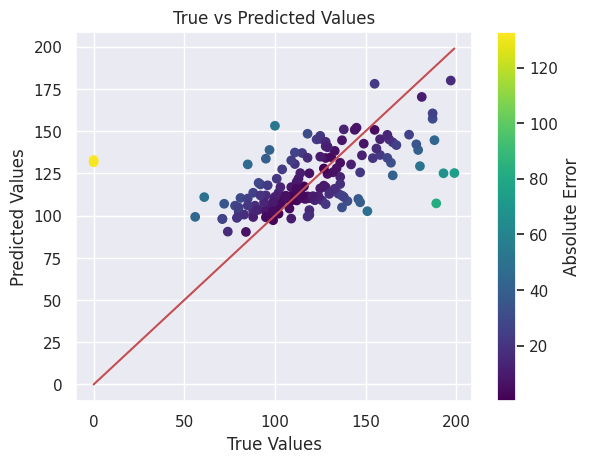

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_true is your true target values and y_pred is your predicted target values
errors = np.abs(y_test - y_pred_test)

plt.scatter(y_test, y_pred_test, c=errors, cmap='viridis')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.colorbar(label='Absolute Error')
plt.show()

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred_test = regressor1.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1),y_test.reshape(len(y_test),1)),1))

[[134.9 136. ]
 [ 96.1 151. ]
 [102.3 109. ]
 [115.3  61. ]
 [118.7 116. ]
 [116.  119. ]
 [112.4 122. ]
 [ 85.9 119. ]
 [106.8  97. ]
 [110.9 105. ]
 [102.  137. ]
 [104.   95. ]
 [138.6 180. ]
 [140.9 138. ]
 [105.7 118. ]
 [148.  165. ]
 [144.5 115. ]
 [ 63.1 126. ]
 [ 81.2  99. ]
 [ 88.8  78. ]
 [116.6 125. ]
 [130.5  85. ]
 [111.6 163. ]
 [136.7 111. ]
 [ 99.   88. ]
 [123.8 128. ]
 [128.6 112. ]
 [132.5 164. ]
 [102.5 102. ]
 [140.4 136. ]
 [135.  118. ]
 [112.   91. ]
 [ 96.   96. ]
 [144.1 181. ]
 [ 99.  108. ]
 [130.8 144. ]
 [ 95.7  88. ]
 [119.6 110. ]
 [109.   72. ]
 [ 90.  103. ]
 [121.6 106. ]
 [ 97.1 104. ]
 [108.7  71. ]
 [136.3 128. ]
 [ 97.1 100. ]
 [ 90.5  80. ]
 [149.3 197. ]
 [119.9 193. ]
 [139.5 101. ]
 [128.2  95. ]
 [ 74.3  74. ]
 [101.1 100. ]
 [123.1 179. ]
 [ 97.8  95. ]
 [123.7 111. ]
 [ 87.2  94. ]
 [127.3 132. ]
 [110.7 112. ]
 [118.4 134. ]
 [132.   92. ]
 [153.6 155. ]
 [ 87.3  84. ]
 [166.1 155. ]
 [114.3 112. ]
 [154.8 118. ]
 [ 97.2 109. ]
 [138.2   

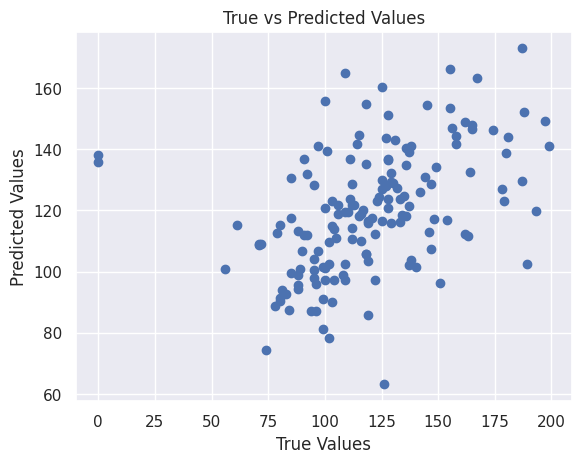

In [ ]:
import matplotlib.pyplot as plt

# Assume y_true is your true target values and y_pred is your predicted target values
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

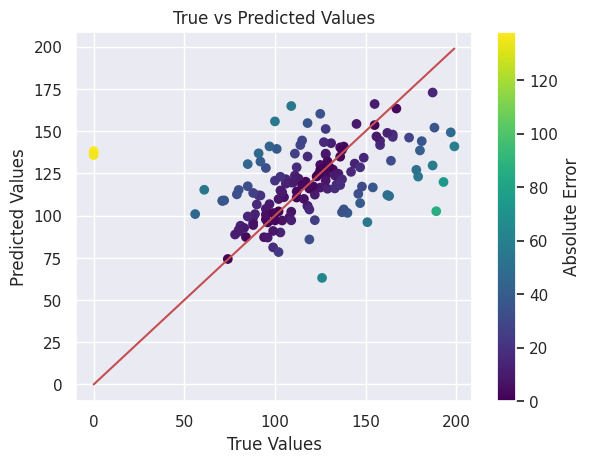

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_true is your true target values and y_pred is your predicted target values
errors = np.abs(y_test - y_pred_test)

plt.scatter(y_test, y_pred_test, c=errors, cmap='viridis')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'r')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.colorbar(label='Absolute Error')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume y_true is your true target values and y_pred is your predicted target values

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error (MAE): 21.0474025974026
Mean Squared Error (MSE): 919.1757792207793
R2 Score: 0.16336868106860591


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor1, X = X_train, y= y_train, cv= 10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 21.04%
Standard Deviation: 12.80%
